* K-Means TODO
** Comparison of predicted and actual clustering (user markers for actual; colors for predicted - have to use matplotlib, not seaborn to do this)
** Accuracy of clustering 2 overlapping Iris species
** Elongated (non-spherical) clusters
** 2 half-moons 
** Uniform data
** Unequal cluster size - 1 small spherical cluster with low variance, 1 large spherical cluster with high variance
** Unequal cluster size - Mickey mouse cluster (https://en.wikipedia.org/wiki/K-means_clustering#/media/File:ClusterAnalysis_Mouse.svg)

In [2]:
#----------
# Explore K-Means 
#----------

# display output from all cmds just like Python shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import sklearn
from sklearn import datasets as d
from sklearn.cluster import k_means

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

print 'sklearn version = {}'.format(sklearn.__version__)


/Users/vissan1/GitHub/python/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


sklearn version = 0.18


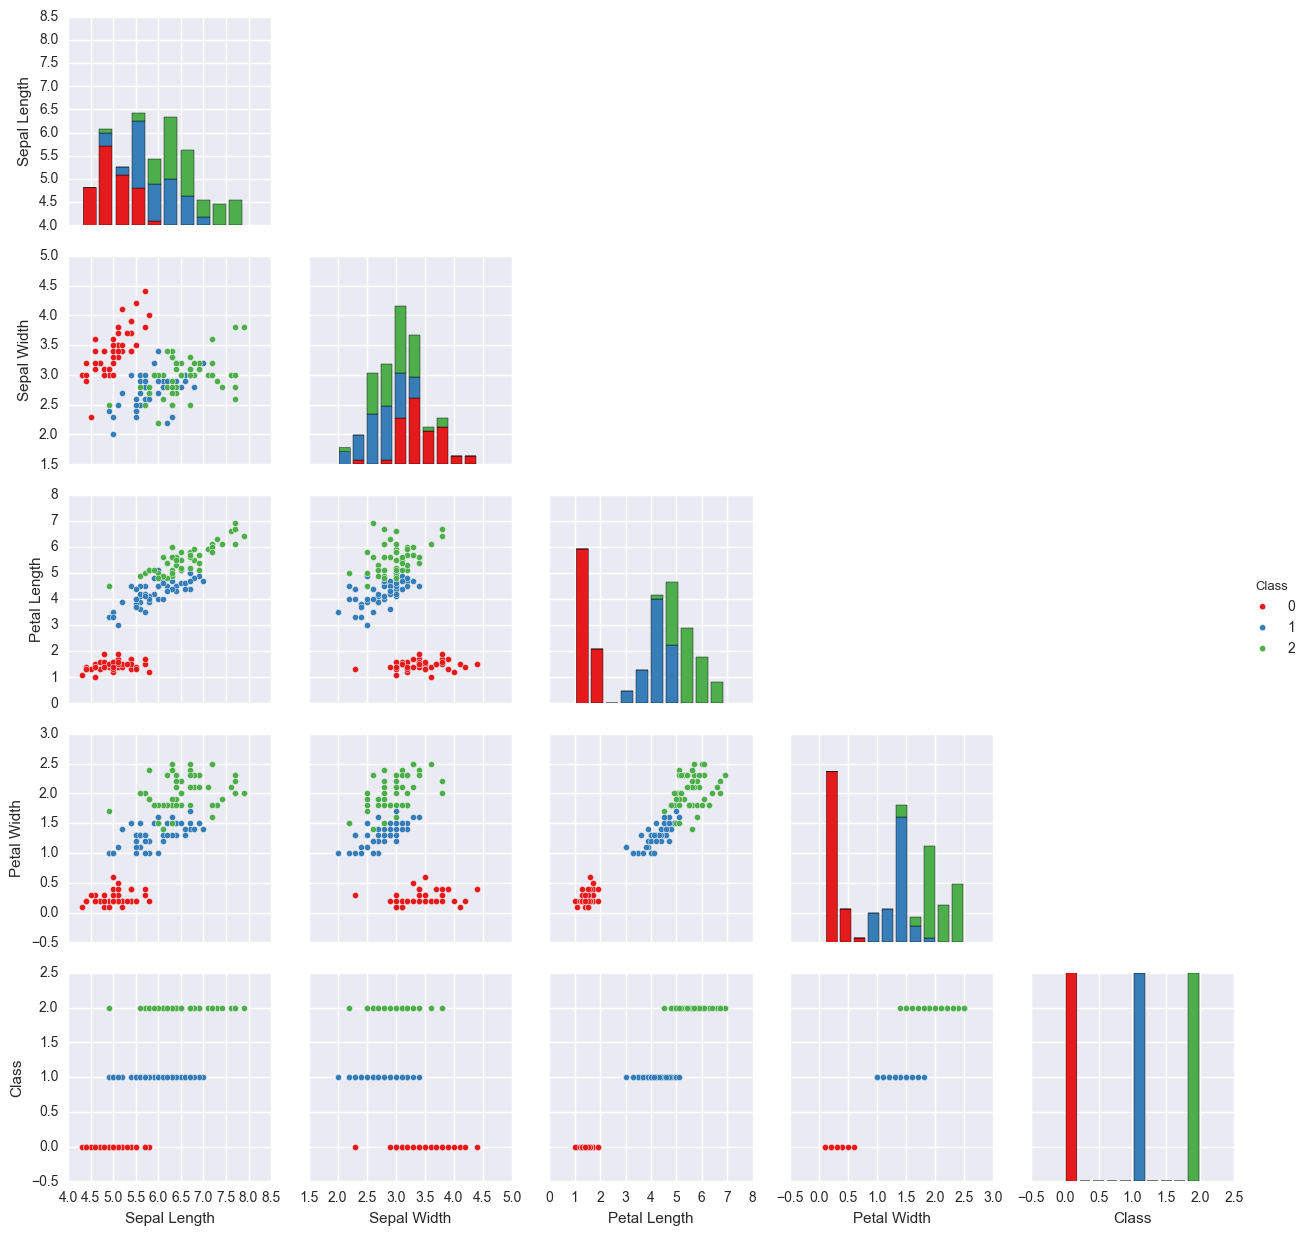

In [3]:
#----------

iris = d.load_iris()
X, y = iris.data, iris.target

dfx = pd.DataFrame(X)

df = pd.concat([dfx, pd.DataFrame(y)], axis=1)
df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']

g = sns.pairplot(df, hue='Class', palette='Set1')
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i,j].set_visible(False)


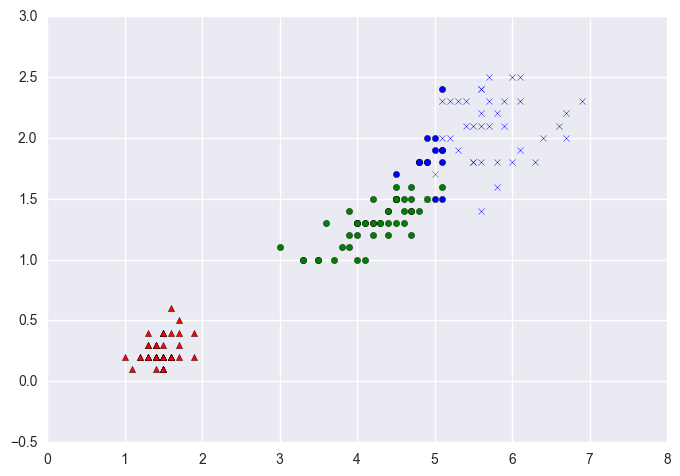

In [76]:
#----------

centroids, labels, inertia = k_means(X, n_clusters=3)
results = pd.concat([df, pd.DataFrame(labels)], axis=1)
results = results.rename(columns = {0:'Pred_Class'})

# labels
# results
# results.head(n=5)

# sns.lmplot(x='Petal Length', y='Petal Width', data=results, hue='Pred Class', hue_order=[0,1,2],
#            markers=['x','o','^'], palette='Set1', fit_reg=False)



cluster1_pred0 = results[(results.Class == 1) & (results.Pred_Class == 0)].as_matrix()
cluster1_pred1 = results[(results.Class == 1) & (results.Pred_Class == 1)].as_matrix()
cluster1_pred2 = results[(results.Class == 1) & (results.Pred_Class == 2)].as_matrix()

cluster2_pred0 = results[(results.Class == 2) & (results.Pred_Class == 0)].as_matrix()
cluster2_pred1 = results[(results.Class == 2) & (results.Pred_Class == 1)].as_matrix()
cluster2_pred2 = results[(results.Class == 2) & (results.Pred_Class == 2)].as_matrix()

fig, ax = plt.subplots()

classes = range(0,3)
colors = ('red', 'green', 'blue')

for cls, col in zip(classes, colors):
    pred0 = results[(results.Class == cls) & (results.Pred_Class == 0)].as_matrix()
    pred1 = results[(results.Class == cls) & (results.Pred_Class == 1)].as_matrix()
    pred2 = results[(results.Class == cls) & (results.Pred_Class == 2)].as_matrix()
    
    ax.scatter(pred0[:,2], pred0[:,3], c=col, marker='o')
    ax.scatter(pred1[:,2], pred1[:,3], c=col, marker='^')
    ax.scatter(pred2[:,2], pred2[:,3], c=col, marker='x')
